In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rd

## Taylor Series for Cosine Trignometry function:
- We can predict the pattern of the $\mathsf{n^{th}}$ derivative of the cosine term using simple logic.
- So The logic here is tedius but its okay im just going with the instinct, if anyone wants to have the same answer, you can use the nth derivative of $\cos$ can be written as $$\;f^{(n)}(x_0)=\cos\!\big(x_0 + n\pi/2\big)$$

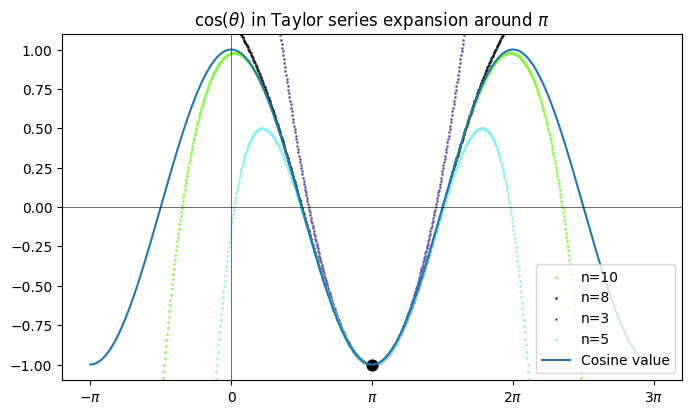

In [468]:

x_0_i=np.pi
n=15
num_list=[10,8,3,5]

def cosTaylor(x,n_max=n,x_0=x_0_i):
    y=0
    for n in range(n_max):
        rem=n%2
        if(rem==0):
            c=(pow(-1,int((n/2)))*np.cos(x_0))/int(math.factorial(n))*(x-x_0)**n
            y=y+c
        else:
            c=(-1*pow(-1,int((n-1)/2))*np.sin(x_0))/int(math.factorial(n))*(x-x_0)**n
            y=y+c
    return y


x_array=np.linspace(-np.pi,3*np.pi,1000)
plt.figure(figsize=(8,4.5))
def plotcomparision(num_list=num_list,x_array=x_array):
    for n in num_list:
        plt.scatter(x_array,cosTaylor(x=x_array,n_max=n),color=np.random.rand(3,),label=f"n={n}",s=1,alpha=0.8)
plotcomparision()
theoretical_y=np.cos(x_array)
plt.plot(x_array,theoretical_y,label="Cosine value")
plt.title(f"$\\cos (\\theta)$ in Taylor series expansion around $\\pi$")
plt.legend(loc="lower right")
plt.scatter(x_0_i,np.cos(x_0_i),s=60,color="black")
plt.ylim(-1.1,1.1)
plt.axhline(y=0,color="black",alpha=0.8,linewidth=0.5)
plt.axvline(x=0,color="black",alpha=0.8,linewidth=0.5)
plt.savefig("CosTaylor.png",dpi=400)
plt.xticks([n*np.pi for n in range(-1,4)],["$-\\pi$","0","$\\pi$","2$\\pi$","3$\\pi$"])
plt.show()


## Taylor Series for Lograthamic Function
### (NO GUESS, JUST MATH):

Finding nth Derivative is a hassle in these functions, but we can always go back to basics, and what we really mean about a derivative.
$$f'(x)=\lim_{h \to  0} \frac{f(x+h)-f(x)}{h}$$
$$f''(x)=\lim_{h \to  0} \frac{f(x+2h)-2(f(x+h))+f(x)}{h^2}$$
By this logic, we can write,
$$f^{(n)}=\sum_{k=0} ^n (-1)^{(n-k)}\; {}^n C_k \frac{f(x+kh)}{h^k}$$


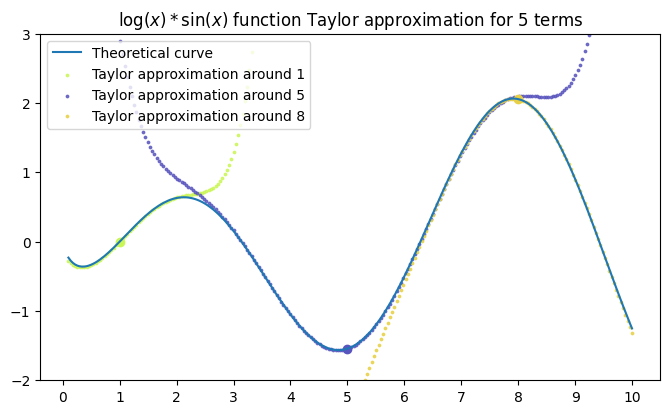

In [452]:
x_0=4
n_max=6
plt.figure(figsize=(8,4.5))
def custom_function(x):
    return np.log(x)*np.sin(x)

def derivative(n,x,h=0.005):
    y=0
    for k in range(n+1):
        nth_term=math.comb(n,k)*(custom_function(x+(k*h)))/(h**n)
        y=y+((-1)**(n-k))*nth_term
    return y

def taylor_with_derivative(x,n_max,x_0):
    y=0
    for n in range(n_max+1):
        y+=(x-x_0)**n/(math.factorial(n))*derivative(n=n,x=x_0)
    return y
x_array=np.linspace(0.1,10,250)
plt.plot(x_array,custom_function(x_array),label="Theoretical curve")
x_0_list=[1,5,8]
def plot_around(x_0_list=x_0_list):
    for x_0_i in x_0_list:
        color=np.random.rand(3,)
        y_array=taylor_with_derivative(x=x_array,n_max=n_max,x_0=x_0_i)
        plt.scatter(x_array,y_array,label=f"Taylor approximation around {x_0_i}",color=color,s=3,alpha=0.8)
        plt.scatter(x_0_i,custom_function(x_0_i),color=color)
plot_around()
plt.ylim(-2,3)
plt.title(f"$\\log(x)*\\sin(x)$ function Taylor approximation for 5 terms")
plt.legend(loc="upper left")
plt.xticks([n for n in range(11)])
plt.show()


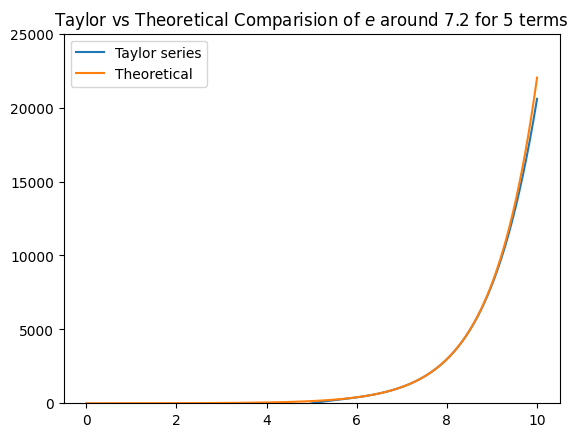

In [ ]:
def expTaylor(x,x_0,n_max):
    t=0
    for n in range (n_max+1):
        t=t+(np.exp(x_0)*pow((x-x_0),n))/int(math.factorial(n))
    return t
x=np.linspace(0,10,1000)
x_0_i=7.2
n=5
y=expTaylor(x=x,x_0=x_0_i,n_max=n)
plt.plot(x,y,label="Taylor series")
plt.plot(x,np.exp(x),label="Theoretical")
plt.title(f"Taylor vs Theoretical Comparision of $e$ around {x_0_i} for {n} terms")
plt.legend()
plt.ylim(0,25000)
plt.xticks([n for n in range(11)])
plt.show()